In [10]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes 
import support_file as sf
import matplotlib.pyplot as plt
import seaborn as sns
import normalization
from sklearn.preprocessing import MinMaxScaler

Importing data

In [11]:
data_hot_clustering = sf.data_hot_clustering

data_norm = normalization.normalized_dataframe
#print(data_norm.info())

# Clusters are strongly influenced by State group
data_clustering = pd.concat([data_norm,data_hot_clustering["State group"]], axis = 1)






Turning df in numpy array, bc ktypes takes numpy array as input

In [12]:
data_array = data_clustering.values
print(data_array)

[[0.7514247440663249 0.6266200194046875 0.9817305285247239
  0.6218423969135802 0.6373215012336538 'MEDIUM']
 [0.36230641030445865 0.3930156526373599 0.5373816959268674
  0.3904754713199937 0.23751328224547602 'LOW']
 [0.7224094088695037 0.7870502725948471 0.43197245643301385
  0.4648712008220528 0.6248649868977214 'LOW']
 ...
 [0.47135426700224914 0.4519305392106132 0.7420922711232892
  0.7646571143255986 0.5631162205385317 'LOW']
 [0.5736246602728934 0.5866994179540119 0.4548380466597813
  0.33705319029186015 0.3687726188518422 'MEDIUM']
 [0.6331775526975603 0.590836898976984 0.24907813056471056
  0.4020757947531872 0.4531458391658588 'HIGH']]


Marking the numerical values (although already float value !! probably not neccessary)

In [13]:
data_array[:,0] = data_array[:,0].astype(float)
data_array[:,1] = data_array[:,1].astype(float)
data_array[:,2] = data_array[:,2].astype(float)
data_array[:,3] = data_array[:,3].astype(float)
data_array[:,4] = data_array[:,4].astype(float)

Choosing optimal number of cluster k

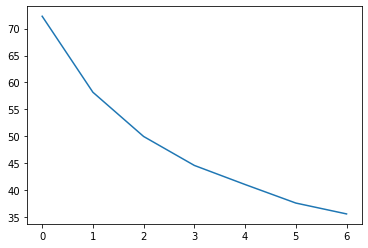

In [14]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang')
    kproto.fit_predict(data_array, categorical=[5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [24]:
kproto = KPrototypes(n_clusters=3, max_iter=20)
clusters = kproto.fit_predict(data_array, categorical=[5])

In [25]:
print(kproto.cluster_centroids_)
print(clusters)

[array([[0.50693141, 0.49927438, 0.61717524, 0.46822396, 0.38084816],
       [0.51157964, 0.51611782, 0.34761807, 0.50166626, 0.41617698],
       [0.59806636, 0.59763701, 0.51453969, 0.67941599, 0.62467124]]), array([['MEDIUM'],
       ['LOW'],
       ['HIGH']], dtype='<U6')]
[0 1 1 2 0 2 1 0 0 1 1 2 0 2 0 0 1 2 1 0 1 0 0 0 1 1 1 2 2 2 2 1 1 2 0 1 1
 1 0 1 1 2 1 2 1 2 2 2 0 1 0 0 0 1 0 1 1 2 2 1 0 1 1 1 0 1 2 2 1 0 1 1 0 1
 1 2 1 0 0 0 2 0 0 0 1 1 0 0 0 2 1 2 0 1 0 0 1 2 0 1 1 1 0 0 1 0 0 1 0 2 2
 2 1 2 0 0 1 0 2 1 0 2 1 0 2 2 1 1 0 2 0 0 2 2 1 2 0 2 1 1 2 0 0 1 2 1 1 1
 0 1 2 2 0 0 0 1 1 1 0 1 0 1 2 0 2 2 0 1 0 1 2 2 1 0 1 0 0 2 0 1 0 2 2 1 1
 1 1 1 0 1 2 2 0 2 2 0 0 2 2 0 1 1 2 2 1 2 1 2 2 2 1 1 2 0 1 0 1 1 0 0 0 2
 1 2 1 2 0 2 1 1 2 2 0 2 1 0 1 1 2 2 0 1 2 0 1 1 0 2 0 2 0 1 0 1 0 1 0 0 0
 0 0 1 2 1 2 0 0 1 2 1 0 0 1 2 1 1 2 0 1 0 1 0 1 0 2 0 1 2 0 1 0 0 0 0 2 0
 0 1 0 0 2 1 1 2 1 2 2 2 1 2 0 2 1 0 0 0 2 2 0 0 1 2 1 2 0 0 0 2 1 2 1 2 1
 0 1 2 0 0 0 0 1 1 0 1 2 0 2 2 0 1 1 0 1 0 1 0 0

In [26]:
cluster_list = []
for i in clusters:
    cluster_list.append(i)

Adding clusters to original dataframe 

In [27]:
data_clustering["Clusters"] = cluster_list

Analyzing cluster 0

In [31]:
data_clustering[data_clustering["Clusters"] == 0].head(10)
data_clustering[data_clustering["Clusters"] == 0].describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Clusters
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,0.506931,0.499274,0.617175,0.468224,0.380848,0.0
std,0.144230,0.133116,0.147582,0.138343,0.117143,0.0
min,0.000000,0.146495,0.352534,0.000000,0.000000,0.0
25%,0.404413,0.402507,0.502640,0.389222,0.299626,0.0
50%,0.495598,0.502451,0.615682,0.476092,0.394345,0.0
75%,0.610175,0.595407,0.715105,0.560130,0.463842,0.0
max,0.805009,0.835753,1.000000,0.779133,0.637322,0.0


Analyzing cluster 1

In [29]:
data_clustering[data_clustering["Clusters"] == 1].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
1,0.362306,0.393016,0.537382,0.390475,0.237513,LOW,1
2,0.722409,0.787050,0.431972,0.464871,0.624865,LOW,1
6,0.675040,0.729859,0.529076,0.360885,0.442581,LOW,1
9,0.182420,0.623743,0.334292,0.503634,0.379621,LOW,1
10,0.392442,0.487353,0.080300,0.467473,0.371588,MEDIUM,1
16,0.541494,0.524849,0.157093,0.595888,0.518013,HIGH,1
18,0.561426,0.573705,0.324647,0.455442,0.452754,LOW,1
20,0.497618,0.472400,0.171632,0.628687,0.472883,HIGH,1
24,0.459315,0.601444,0.364647,0.644646,0.534983,LOW,1
25,0.384142,0.487238,0.588449,0.717850,0.524578,LOW,1


Analyzing cluster 2

In [30]:
data_clustering[data_clustering["Clusters"] == 2].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
3,0.656645,0.531630,0.000000,0.851953,0.737712,HIGH,2
5,0.674313,0.736999,0.588489,0.489867,0.601066,LOW,2
11,0.466977,0.828157,0.522282,0.618895,0.672268,MEDIUM,2
13,0.752981,0.662581,0.607978,0.886472,0.868053,MEDIUM,2
17,0.540772,0.522277,0.539086,0.729479,0.569452,HIGH,2
27,0.644689,0.604241,0.513112,0.643351,0.643952,MEDIUM,2
28,0.508768,0.456534,0.464076,0.713281,0.554179,HIGH,2
29,0.761609,0.700787,0.550178,0.588286,0.649503,MEDIUM,2
30,0.483463,0.676910,0.382070,0.626834,0.587734,HIGH,2
33,0.563611,0.808285,0.635791,0.930772,0.918436,LOW,2


Visualizing clusters

In [32]:
x = data_clustering.iloc[:,[0,4]].values

#print(x)

kproto = KPrototypes(n_clusters=3, max_iter=20,init='Cao')
clusters = kproto.fit_predict(x, categorical=[2])



plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")

#plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title('K-Prototypes clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

AssertionError: Categorical index larger than number of columns.